In [189]:
## I prefer to use Python and Excel in the intial stages of an analysis as there are many ways to check
## the quality of the data, and are often easier/more accurate compared to other methods. In this first 
## section I'm installing pandas and numpy to be able to load in the CSV data and perform tests to
## gauge its quality, and get an understanding of the variables and data scructure. 

In [368]:
import pandas as pd
import numpy as np

In [369]:
p = pd.read_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\PRODUCTS_TAKEHOME.csv')
t = pd.read_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\TRANSACTION_TAKEHOME.csv')
u = pd.read_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\USER_TAKEHOME.csv')

In [370]:
## Viewing the dataframes coming from the CSV files at a high level.

In [371]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [372]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [373]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [374]:
## Now I will check to see the number of missing values by column across the three dataframes.

In [375]:
p.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [376]:
t.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [377]:
u.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [378]:
## After visually checking the Excel files, I noticed the "FINAL_SALE" column had many blank cells, but the python code 
## shows that there are 0 nulls there. It appears that the cells have a blank space (' '), which represents no value, 
## but does not show up as null as the cell is technically not empty. I will impute a null value for these instances,
## across all the dataframes in case this occurs elsewhere.

In [379]:
t.replace(' ', np.nan, inplace=True)

In [380]:
p.replace(' ', np.nan, inplace=True)
u.replace(' ', np.nan, inplace=True)

In [381]:
## Checking to see if the blank spaces are now kept as nulls.
t.isnull().sum()

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE            5762
FINAL_QUANTITY        0
FINAL_SALE        12500
dtype: int64

In [382]:
## It worked! The nulls are recognized, now I'll check the other dataframes.

In [383]:
p.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [384]:
u.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [385]:
## The product and user dataframes did not have issues with blank spaces. 

In [393]:
## Removing observations with missing FINAL_SALE values.  
t = t.dropna(subset=['FINAL_SALE'])

In [395]:
t['FINAL_SALE'].isnull().sum()

np.int64(0)

In [396]:
## Another data quality issue is also in the Transactions table in the "FINAL_QUANTITY" column. Some of the values are 
## stored as a numeral (1), but the zero values are stored as text (zero). Since it is only zero this is happening to, 
## I will change "zero" to "0". However if there were more occurances I would not manually change each instance and 
## rather perform an action on the entire column. 

In [397]:
t['FINAL_QUANTITY'] = t['FINAL_QUANTITY'].replace('zero',0)

In [398]:
t['FINAL_QUANTITY'].unique()

array([0, '1.00', '2.00', '6.00', '3.00', '4.00', '5.00', '7.00', '12.00',
       '0.87', '0.62', '2.10', '0.09', '3.33', '1.24', '18.00', '10.00',
       '2.54', '0.53', '2.20', '1.69', '1.93', '2.89', '1.34', '1.13',
       '8.00', '2.19', '0.83', '0.46', '4.55', '0.65', '2.61', '0.28',
       '1.50', '0.97', '0.23', '0.24', '1.18', '0.86', '6.22', '1.22',
       '1.23', '1.28', '2.57', '1.07', '2.75', '1.47', '2.11', '16.00',
       '1.81', '0.48', '1.35', '2.17', '9.00', '3.11', '1.08', '5.53',
       '1.89', '0.01', '2.18', '1.99', '0.04', '276.00', '2.25', '1.37',
       '3.02', '2.58', '0.35', '0.99', '1.80', '1.54', '3.24', '2.39',
       '2.60', '2.83', '2.93', '0.51', '0.94', '2.04', '1.40', '1.44',
       '1.88', '2.34', '3.69', '0.70', '2.52', '2.27'], dtype=object)

In [399]:
## Similar to the missing values, I'll check for duplicate rows.

In [400]:
p.duplicated().sum()

np.int64(215)

In [401]:
t.duplicated().sum()

np.int64(157)

In [402]:
u.duplicated().sum()

np.int64(0)

In [403]:
## It is important to remove these duplicated rows for the product and transaction data. In some contexts duplicate rows 
## are not a bad thing, but for this analysis it does not make sense to leave them in. The products table only needs one
## instance of each observation to be effective when referenced. The transactions table contains an observation for each
## individual transaction with a unique recipt ID, so it wouldn't be useful to have multiples of the same exact purchase. 

In [404]:
p = p.drop_duplicates()
t = t.drop_duplicates()

In [405]:
p.duplicated().sum()

np.int64(0)

In [406]:
t.duplicated().sum()

np.int64(0)

In [407]:
## There are now no duplicated rows in any of the dataframes.

<Axes: xlabel='FINAL_QUANTITY', ylabel='Count'>

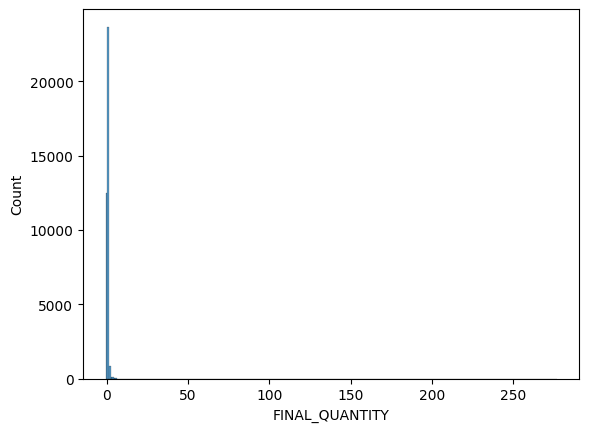

In [409]:
sns.histplot(t['FINAL_QUANTITY'], bins=5)

<Axes: xlabel='FINAL_SALE', ylabel='Count'>

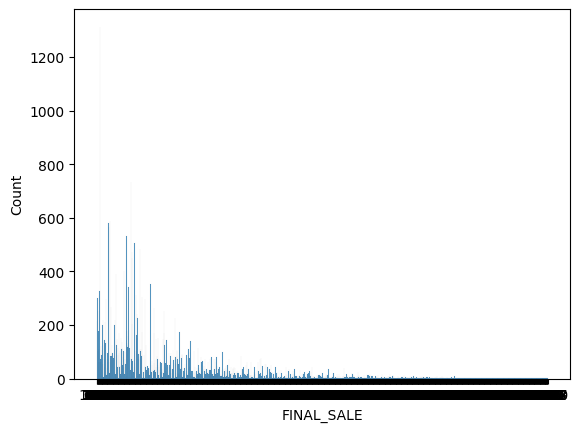

In [410]:
sns.histplot(t['FINAL_SALE'], bins=5)

In [412]:
## Based on these histograms, it appears there are some outliers. I need to remove these values. This won't be relevant 
## for all columns in the data, so I will only check those it pertains to. 

In [413]:
t['FINAL_QUANTITY'].apply(type).value_counts()

FINAL_QUANTITY
<class 'str'>    24852
<class 'int'>    12491
Name: count, dtype: int64

In [414]:
## The values in the "FINAL_QUANTITY" column are not all the same data type, they are part integers and part strings. 
## Integer type is only for numbers that do NOT have a decimal (this data does), which is why some are stored as strings. 
## For this dataset, I'm making the assumption we want only whole values for the sales quantity. 

In [415]:
t['FINAL_QUANTITY'] = t['FINAL_QUANTITY'].astype(float)

In [416]:
t['FINAL_QUANTITY'] = t['FINAL_QUANTITY'].astype(int)

In [417]:
t['FINAL_QUANTITY'].unique()

array([  0,   1,   2,   6,   3,   4,   5,   7,  12,  18,  10,   8,  16,
         9, 276])

In [418]:
## Using the IQR method with a multiplier of 2 (vs. 1.5) to determine the outliers.
Q1 = t['FINAL_QUANTITY'].quantile(0.25)
Q3 = t['FINAL_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

outliers = t[(t['FINAL_QUANTITY'] < lower_bound) | (t['FINAL_QUANTITY'] > upper_bound)]

In [419]:
## Removing the outlier observations from the FINAL_QUANTITY data.
t = t[~t.isin(outliers)].dropna()

In [420]:
## Transactions with $0 arent useful for this analysis, so I will remove them.
t['FINAL_SALE'].apply(type).value_counts()

FINAL_SALE
<class 'str'>    32924
Name: count, dtype: int64

In [421]:
## FINAL_SALE should be a float rather than an integer because it can have non-whole number values. 
t['FINAL_SALE'] = t['FINAL_SALE'].astype(float)

In [422]:
t = t[t['FINAL_SALE'] != 0.00]

In [423]:
## Checking to see if there are any 0 value transcactions left. (None remain, output is long so I commented out code)
## sorted(t['FINAL_SALE']) 

[0.03,
 0.04,
 0.04,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.07,
 0.09,
 0.09,
 0.1,
 0.1,
 0.12,
 0.13,
 0.13,
 0.13,
 0.14,
 0.17,
 0.17,
 0.18,
 0.18,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.29,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.32,
 0.32,
 0.32,
 0.32,
 0.32,
 0.33,
 0.33,
 0.33,
 0.33,
 0.33,
 0.33,
 0.34,
 0.34,
 0.35,
 0.35,
 0.35,
 0.35,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.42,
 0.42,
 0.42,
 0.42,
 0.43,
 0.44,
 0.44,
 0.44,
 0.44,
 0.45,
 0.46,
 0.46,
 0.46,
 0.46,
 0.46,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0.47,
 0

In [424]:
## Using the IQR method with a multiplier of 2 (vs. 1.5) to determine the outliers
Q1 = t['FINAL_SALE'].quantile(0.25)
Q3 = t['FINAL_SALE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

outliersFS = t[(t['FINAL_SALE'] < lower_bound) | (t['FINAL_SALE'] > upper_bound)]

In [425]:
## Removing the outlier observations from the FINAL_SALE data.
t = t[~t.isin(outliersFS)].dropna()

<Axes: xlabel='FINAL_QUANTITY', ylabel='Count'>

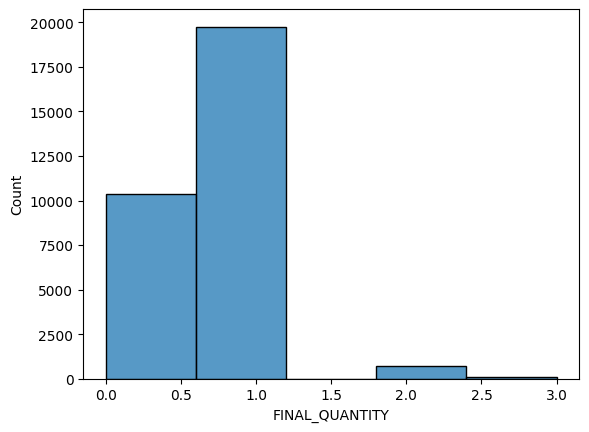

In [430]:
sns.histplot(t['FINAL_QUANTITY'], bins=5)

<Axes: xlabel='FINAL_SALE', ylabel='Count'>

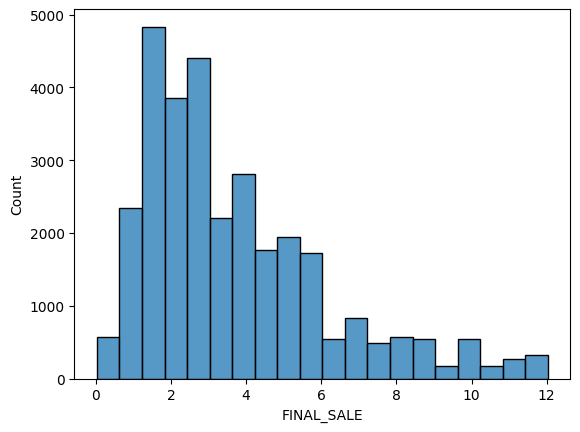

In [431]:
sns.histplot(t['FINAL_SALE'], bins=20)

In [ ]:
## The distribution of the numeric variables in these histograms looks much better than it did before the outliers 
## were removed. 

In [355]:
## After cleaning up the data, it seems to be in a great place for the analysis that needs to be done on it! The specific
## analysis that's being performed will dictate the pieces of the dataset that require modification. 

In [356]:
## Now, I will write these cleaned dataframes back to CSV files so I can access them via SQL.
p.to_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\PRODUCTS_UPDATED.csv', index=False)
t.to_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\TRANSACTION_UPDATED.csv', index=False)
u.to_csv(r'C:\Users\grace\Downloads\Fetch_TakeHome\USER_UPDATED.csv', index=False)